<a href="https://colab.research.google.com/github/Shahupatil2407/Machine-Learning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("/content/hearing_test.csv")

In [66]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [67]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [68]:
df['test_result'].value_counts()

,count
test_result,
1,3000
0,2000


<Axes: xlabel='test_result', ylabel='count'>

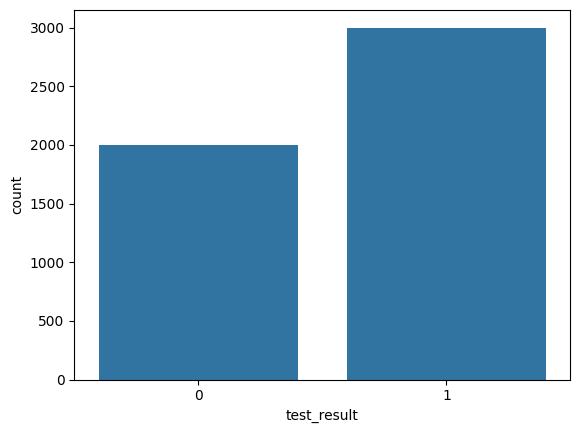

In [69]:
sns.countplot(data=df,x=df['test_result'])

<Axes: xlabel='test_result', ylabel='age'>

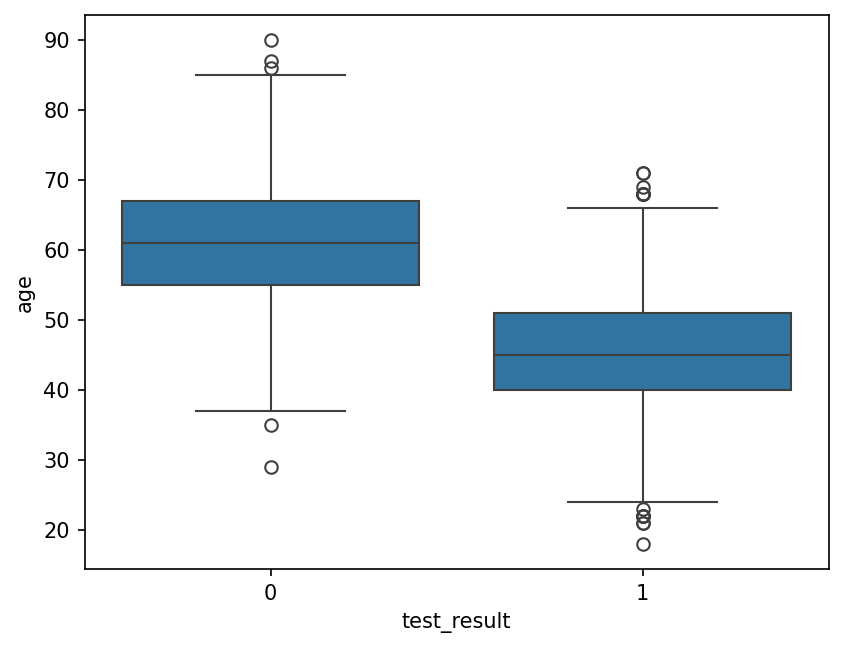

In [70]:
plt.figure(dpi=150)
sns.boxplot(data=df,x=df['test_result'],y=df['age'])

<Axes: xlabel='test_result', ylabel='physical_score'>

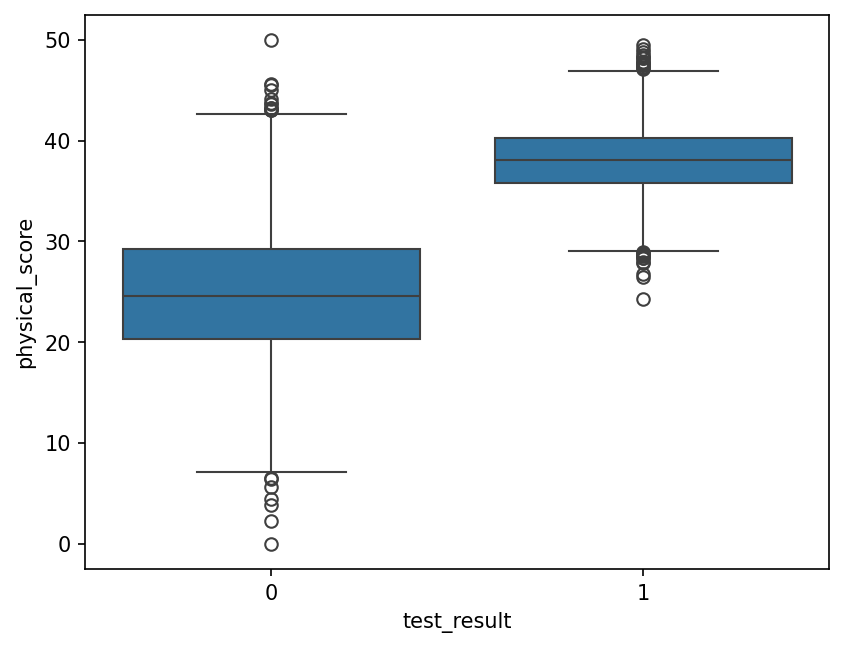

In [71]:
plt.figure(dpi=150)
sns.boxplot(data=df,x=df['test_result'],y=df['physical_score'])

<Axes: xlabel='age', ylabel='physical_score'>

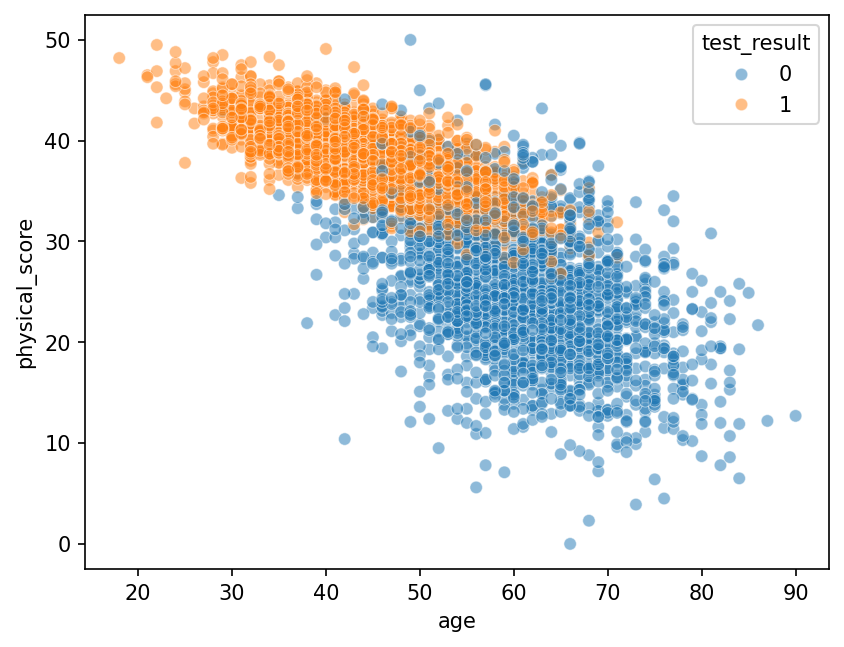

In [72]:
plt.figure(dpi=150)
sns.scatterplot(data = df,x='age',y='physical_score',hue='test_result',alpha=0.5)

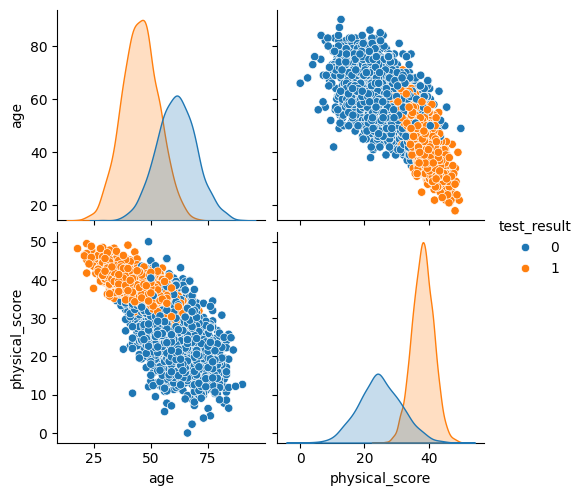

In [73]:
sns.pairplot(data=df,hue='test_result')

<Axes: >

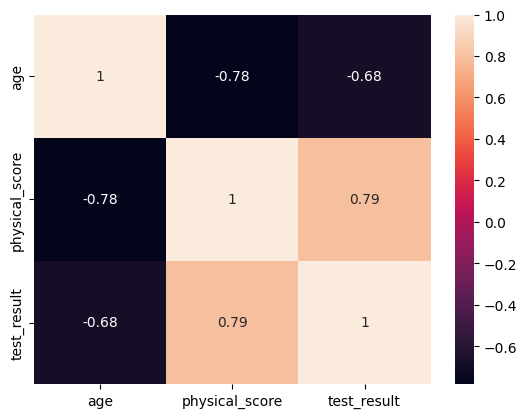

In [74]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

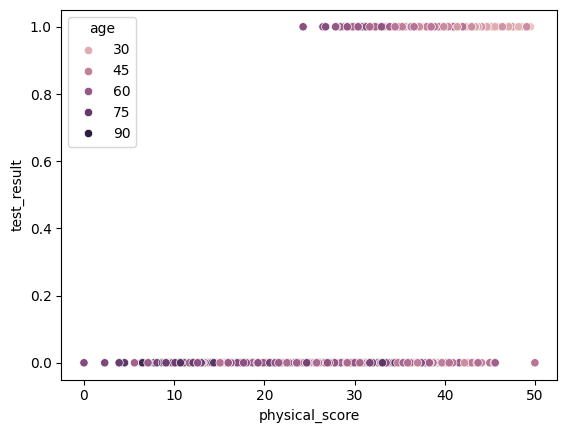

In [75]:
sns.scatterplot(data=df,x=df['physical_score'],y=df['test_result'],hue=df['age'],)

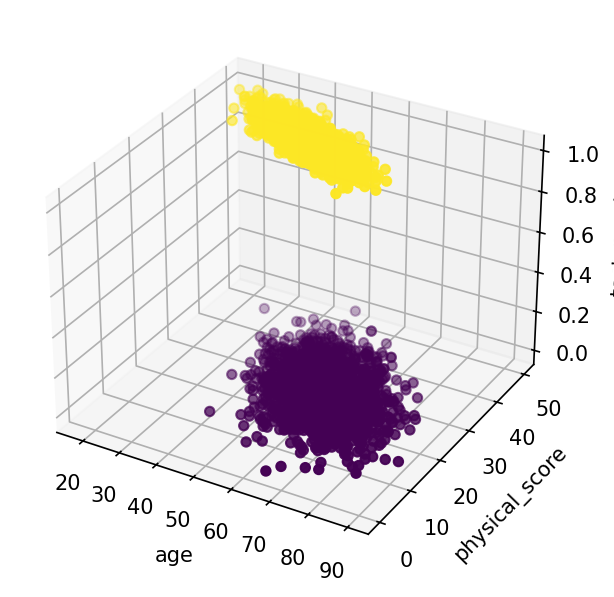

In [76]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['age'],df['physical_score'],df['test_result'],c=df['test_result'])
ax.set_xlabel('age')
ax.set_ylabel('physical_score')
ax.set_zlabel('test_result')
plt.show()

In [77]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [78]:
X = df.drop('test_result',axis=1)
y = df['test_result']

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [82]:
scaler = StandardScaler()

In [83]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
#help(LogisticRegression)

In [86]:
log_model = LogisticRegression()

In [87]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [88]:
pred = log_model.predict(X_test)

In [89]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [90]:
y_pred_prob = log_model.predict_proba(X_test)

In [91]:
y_pred_prob

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [92]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

In [93]:
accuracy_score(y_test,pred)

0.93

In [95]:
confusion_matrix(y_test,pred,labels=[1,0])

array([[293,  14],
       [ 21, 172]])

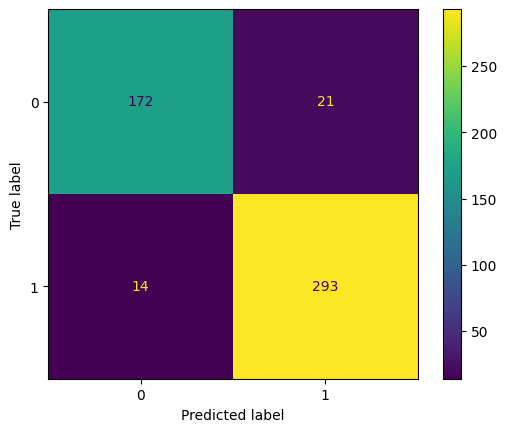

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix_display = ConfusionMatrixDisplay.from_estimator(log_model,X_test,y_test)

In [98]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [99]:
from sklearn.metrics import precision_score, recall_score

In [100]:
precision_score(y_test,pred)

0.9331210191082803

In [102]:
recall_score(y_test,pred)

0.9543973941368078

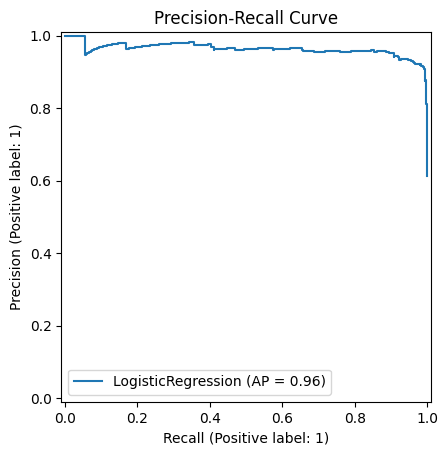

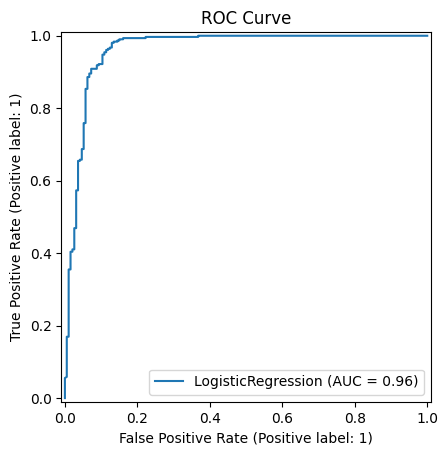

In [106]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

# Plot Precision-Recall Curve
PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

# Plot ROC Curve
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title('ROC Curve')
plt.show()